# TFIDF Vectorize

In [9]:
# load the packages
import json  
import re
from collections import Counter
import copy
import string
import time
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize  
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from textblob import TextBlob
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
stop_words = set(stopwords.words('english'))
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import RegexpTokenizer
from nltk.tag import StanfordNERTagger
from gensim.models import Word2Vec

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE

# Plotly
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)

from sklearn.metrics import classification_report

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

SEED = 42

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jiaying/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/jiaying/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/jiaying/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/jiaying/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [3]:
df = pd.read_csv('desc_clean.csv', lineterminator='\n')

In [5]:
df.description.fillna('', inplace = True)

In [6]:
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.5, 
                                min_df = 10)
dtm_tf = tf_vectorizer.fit_transform(df.description)
print(dtm_tf.shape)

(120746, 46433)


In [7]:
tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())
dtm_tfidf = tfidf_vectorizer.fit_transform(df.description)
print(dtm_tfidf.shape)

(120746, 46433)


Number of components = 10 and explained variance = 0.04222756585037695
Number of components = 20 and explained variance = 0.06985044855636773
Number of components = 50 and explained variance = 0.1242805121830297
Number of components = 100 and explained variance = 0.18552105754400733
Number of components = 500 and explained variance = 0.4174514899300348
Number of components = 1000 and explained variance = 0.5583672857329476
Number of components = 3000 and explained variance = 0.8048443149779381
Number of components = 4000 and explained variance = 0.8630223145114395
Number of components = 4500 and explained variance = 0.8843894771115903


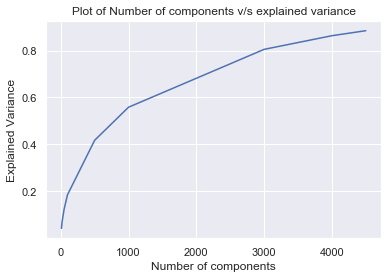

In [21]:
# find the optimal number of components for Truncated SVD
n_comp = [10,20,50,100,500,1000,3000,4000,4500] # list containing different values of components
explained = [] # explained variance ratio for each component of Truncated SVD
for x in n_comp:
    svd = TruncatedSVD(n_components=x)
    svd.fit(dtm_tfidf)
    explained.append(svd.explained_variance_ratio_.sum())
    print("Number of components = %r and explained variance = %r"%(x,svd.explained_variance_ratio_.sum()))

plt.plot(n_comp, explained)
plt.xlabel('Number of components')
plt.ylabel("Explained Variance")
plt.title("Plot of Number of components v/s explained variance")
plt.show()

In [22]:
svd = TruncatedSVD(n_components=4500)
tfidf = svd.fit_transform(dtm_tfidf)

In [26]:
tfidf_df = pd.DataFrame(tfidf)

In [30]:
tfidf_df.to_csv('tfidf4500.csv', index = False)